In [1]:
!pip install pathfinding

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import pathfinding as pf
from google.colab.patches import cv2_imshow

In [3]:
!gdown "https://drive.google.com/uc?id=1-5EF4BaQr4H7Qjf6xgIgWQKFmEP7P5MC"

Downloading...
From: https://drive.google.com/uc?id=1-5EF4BaQr4H7Qjf6xgIgWQKFmEP7P5MC
To: /content/Screenshot from 2024-09-26 21-55-54.png
100% 325k/325k [00:00<00:00, 70.7MB/s]


In [4]:
!gdown "https://drive.google.com/uc?id=1pl9J_ZGij_DFT8PGk8JwBrJhibUzy1uG"

Downloading...
From: https://drive.google.com/uc?id=1pl9J_ZGij_DFT8PGk8JwBrJhibUzy1uG
To: /content/ago_field_1.1.png
100% 345k/345k [00:00<00:00, 73.0MB/s]


In [5]:
img = cv.imread('/content/Screenshot from 2024-09-26 21-55-54.png')

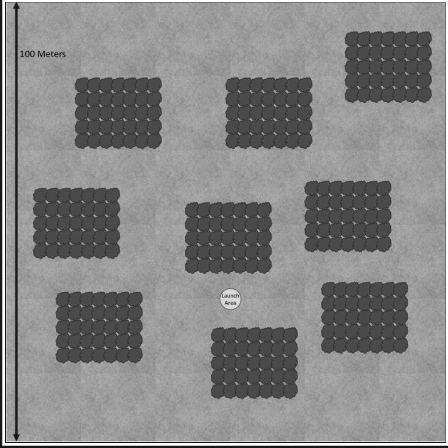

In [6]:
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

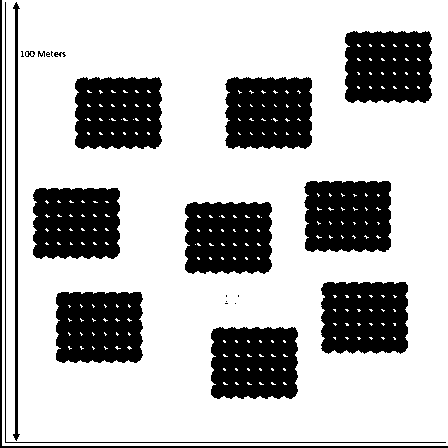

In [7]:
binary_img = cv.threshold(img_gray,100,255,cv.THRESH_BINARY)[1]
cv2_imshow(binary_img)

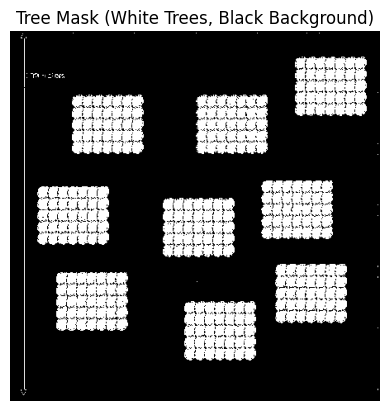

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Convert the image to a NumPy array
image_np = np.array(img)

# Define the color thresholds for dark green (trees)
lower_green = np.array([20, 70, 20])   # Lower bound for green (adjustable based on inspection)
upper_green = np.array([100, 180, 100])  # Upper bound for green

# Extract the RGB channels (ignore the alpha channel if present)
image_rgb = image_np[..., :3]

# Create a mask based on the color range
mask = (image_rgb >= lower_green) & (image_rgb <= upper_green)
mask = np.all(mask, axis=-1)  # Combine all channels

# Create a new mask image with trees as white and background as black
tree_mask_image = np.zeros_like(image_rgb)
tree_mask_image[mask] = [255, 255, 255]  # White for trees, black for background

# Convert the result back to an image
tree_mask_image_pil = Image.fromarray(tree_mask_image)

# Save the mask image (optional)
tree_mask_image_pil.save('tree_mask.png')

# Display the result
plt.imshow(tree_mask_image)
plt.axis('off')
plt.title("Tree Mask (White Trees, Black Background)")
plt.show()


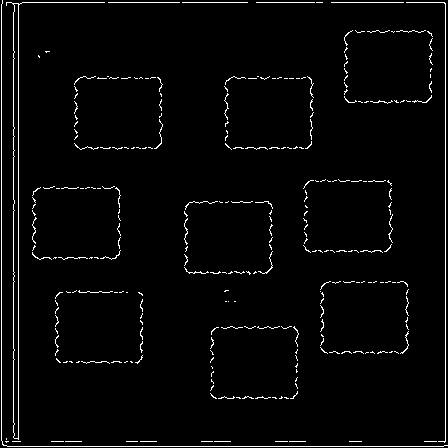

In [9]:
blur = cv.GaussianBlur(img_gray,(5,5),cv.BORDER_DEFAULT)
edge = cv.Canny(blur,150,160)
cv2_imshow(edge)


In [10]:
from PIL import Image

# Load the image file
image_path = "/content/Screenshot from 2024-09-26 21-55-54.png"
image = Image.open(image_path)
# Show the image to understand its structure

image.show()


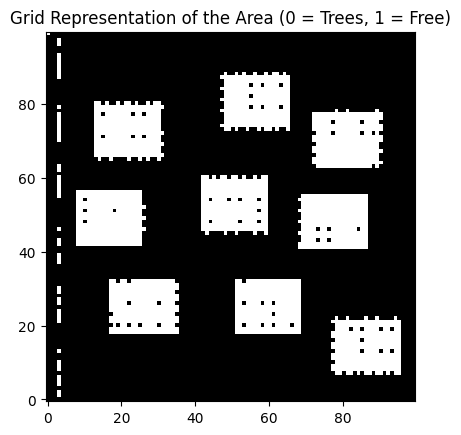

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Rescale the image to a 100x100 grid for simplicity
image_rescaled = image.resize((100, 100))
image_array = np.array(image_rescaled)

# Marking the regions: Assuming dark green is trees, yellow is the launch area, green is free area
# Let's define RGB ranges to differentiate between regions (approximations based on the image)
dark_green_threshold = (30, 100)  # Trees
yellow_threshold = (200, 255)  # Launch area
green_threshold = (151, 199)  # Free area

# Convert the image into a grid
grid = np.ones((100, 100))  # Initialize as free area

for i in range(100):
    for j in range(100):
        pixel_value = image_array[i, j]
        if dark_green_threshold[0] <= pixel_value[1] <= dark_green_threshold[1]:  # Trees
            grid[i, j] = 0  # Mark as obstacle
        elif yellow_threshold[0] <= pixel_value[0] <= yellow_threshold[1]:  # Launch area
            start = (i, j)  # Mark the launch area

# Display the grid (1 for free, 0 for obstacles)
plt.imshow(grid, cmap='Greys', origin='lower')
plt.title('Grid Representation of the Area (0 = Trees, 1 = Free)')
plt.show()


Geedy search Methode

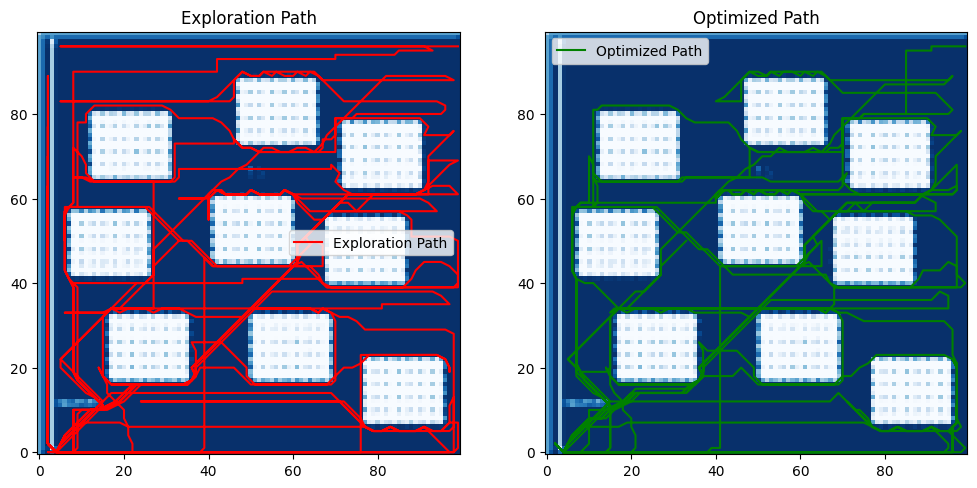

Exploration flight time: 4744.00 seconds
Exploration steps: 2372
Optimized flight time: 3408.00 seconds
Optimized steps: 1704
2372


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
import csv
import cv2

import heapq
class AStarSearcher:
    def __init__(self, grid, node_radius, sweep_radius):
        self.grid = grid
        self.node_radius = node_radius
        self.sweep_radius = sweep_radius
        (self.rows, self.cols) = grid.shape

    def heuristic(self, a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def neighbors(self, node):
        result = []
        for dx in range(-self.node_radius, self.node_radius + 1):
            for dy in range(-self.node_radius, self.node_radius + 1):
                if dx*2 + dy*2 <= self.node_radius*2:
                    neighbor = (node[0] + dx, node[1] + dy)
                    if (0 <= neighbor[0] < self.rows and
                        0 <= neighbor[1] < self.cols and
                        self.grid[neighbor] == 1):
                        result.append(neighbor)
        return result

    def mark_visited(self, visited, node):
        for dx in range(-self.sweep_radius, self.sweep_radius + 1):
            for dy in range(-self.sweep_radius, self.sweep_radius + 1):
                if dx**2 + dy**2 <= self.sweep_radius**2:
                    x, y = node[0] + dx, node[1] + dy
                    if 0 <= x < self.rows and 0 <= y < self.cols:
                        visited[x, y] = 1


    def a_star_search(self, start, goal): # Aligned with other methods of the class
        open_set = []
        heapq.heappush(open_set, (0, start))
        came_from = {}
        g_score = {start: 0}
        f_score = {start: self.heuristic(start, goal)}

        while open_set:
            _, current = heapq.heappop(open_set)

            if current == goal:
                total_path = [current]
                while current in came_from:
                    current = came_from[current]
                    total_path.append(current)
                total_path.reverse()
                return total_path

            for neighbor in self.neighbors(current):
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + self.heuristic(neighbor, goal)
                    if neighbor not in [i[1] for i in open_set]:
                        heapq.heappush(open_set, (f_score[neighbor], neighbor))

        return []

    def explore(self):
        path = []
        visited = np.zeros_like(self.grid)
        unexplored = np.argwhere(self.grid == 1)

        if len(unexplored) == 0:
            return path

        start = (50,33)
        path.append(start)
        self.mark_visited(visited, start)

        while len(unexplored) > 0:
            unexplored = np.argwhere((self.grid == 1) & (visited == 0))
            if len(unexplored) == 0:
                break

            for goal in unexplored:
                goal = tuple(goal)
                if not visited[goal]:
                    partial_path = self.a_star_search(start, goal)
                    path.extend(partial_path[1:])
                    for p in partial_path:
                        self.mark_visited(visited, p)
                    start = goal

        return path
    def optimize_path(self, path):
        optimized_path = []
        if not path:
            return optimized_path

        start = path[0]
        optimized_path.append(start)

        for i in range(1, len(path)):
            current = path[i]

            if i == len(path) - 1 or (path[i - 1][0] != current[0] and path[i - 1][1] != current[1]):
                partial_path = self.a_star_search(start, current)

                optimized_path.extend(partial_path[1:])

                start = current

        return optimized_path

    def plot_trajectory(exploration_path, optimized_path, grid):
       plt.figure(figsize=(12, 6))
       plt.subplot(1, 2, 1)
       plt.imshow(grid, cmap='Blues', origin='lower')
       path = np.array(exploration_path)
       plt.plot(path[:, 1], path[:, 0], 'r-', label='Exploration Path')
       plt.title("Exploration Path")
       plt.legend()

       plt.subplot(1, 2, 2)
       plt.imshow(grid, cmap='Blues', origin='lower')
       path = np.array(optimized_path)
       plt.plot(path[:, 1], path[:, 0], 'g-', label='Optimized Path')
       plt.title("Optimized Path")
       plt.legend()

       plt.show()

    def write_path_to_csv(path, filename='trajectory.csv'):
        with open(filename, mode='w', newline='') as file:
          writer = csv.writer(file)
          writer.writerow(['Row', 'Column'])
          for coord in path:
            writer.writerow(coord)

# Example usage
image = cv.imread(r"/content/Screenshot from 2024-09-26 21-55-54.png", 0)
thresh_value, thresh_im = cv.threshold(image, 100, 255, cv.THRESH_BINARY)
resized_image = cv.resize(thresh_im, (100, 100), interpolation=cv.INTER_AREA)
resized_image = resized_image / 255.0

node_radius = 2
sweep_radius = 6  # 6 meters

searcher = AStarSearcher(resized_image, node_radius, sweep_radius)
exploration_path = searcher.explore()

# Further optimization can be done using high-level algorithms
optimized_path = searcher.optimize_path(exploration_path)
plot_trajectory(exploration_path, optimized_path, resized_image)


write_path_to_csv(exploration_path, 'exploration_path.csv')
write_path_to_csv(optimized_path, 'optimized_path.csv')


exploration_length = len(exploration_path)
drone_speed = 0.5
exploration_time = exploration_length / drone_speed
print(f"Exploration flight time: {exploration_time:.2f} seconds")
print(f"Exploration steps: {exploration_length}")


optimized_length = len(optimized_path)
optimized_time = optimized_length / drone_speed
print(f"Optimized flight time: {optimized_time:.2f} seconds")
print(f"Optimized steps: {optimized_length}")

print(len(exploration_path))



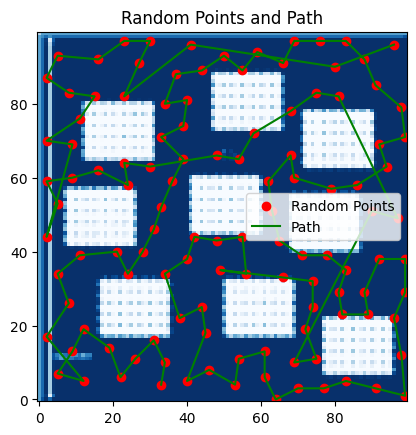

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

class RandomPointSearcher:
    def __init__(self, grid, sweep_radius, max_attempts=1000):
        self.grid = grid
        self.sweep_radius = sweep_radius
        self.max_attempts = max_attempts
        (self.rows, self.cols) = grid.shape

    def is_covered(self, visited, point):
        for dx in range(-self.sweep_radius, self.sweep_radius + 1):
            for dy in range(-self.sweep_radius, self.sweep_radius + 1):
                if dx**2 + dy**2 <= self.sweep_radius**2:
                    x, y = point[0] + dx, point[1] + dy
                    if 0 <= x < self.rows and 0 <= y < self.cols:
                        visited[x, y] = 1

    def generate_random_points(self):
        points = []
        visited = np.zeros_like(self.grid)
        attempts = 0

        while np.any((self.grid == 1) & (visited == 0)) and attempts < self.max_attempts:
            random_point = (np.random.randint(0, self.rows), np.random.randint(0, self.cols))
            if self.grid[random_point] == 1 and not visited[random_point]:
                points.append(random_point)
                self.is_covered(visited, random_point)
            attempts += 1

        return points

    def connect_points(self, points):
        # Implement a simple heuristic to connect points, such as Nearest Neighbor
        path = [points[0]]
        remaining_points = set(points[1:])

        while remaining_points:
            current = path[-1]
            next_point = min(remaining_points, key=lambda p: np.linalg.norm(np.array(p) - np.array(current)))
            path.append(next_point)
            remaining_points.remove(next_point)

        return path

def plot_trajectory(points, path, grid):
    plt.imshow(grid, cmap='Blues', origin='lower')
    points_array = np.array(points)
    plt.scatter(points_array[:, 1], points_array[:, 0], c='red', label='Random Points')
    path_array = np.array(path)
    plt.plot(path_array[:, 1], path_array[:, 0], 'g-', label='Path')
    plt.title("Random Points and Path")
    plt.legend()
    plt.show()

def main():
    image = cv2.imread(r"/content/Screenshot from 2024-09-26 21-55-54.png", 0)
    thresh_value, thresh_im = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
    resized_image = cv2.resize(thresh_im, (100, 100), interpolation=cv2.INTER_AREA)
    resized_image = resized_image / 255.0

    sweep_radius = 6  # 6 meters
    searcher = RandomPointSearcher(resized_image, sweep_radius)

    random_points = searcher.generate_random_points()
    path = searcher.connect_points(random_points)

    plot_trajectory(random_points, path, resized_image)

if __name__ == "__main__":
    main()


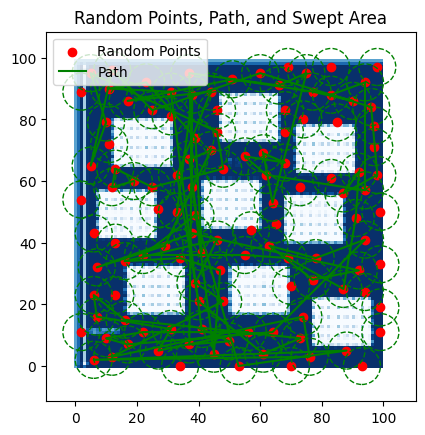

Total path length: 2269.78 meters
Flight time: 4539.57 seconds


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

class RandomPointSearcher:
    def __init__(self, grid, sweep_radius, start_point, max_attempts=1000):
        self.grid = grid
        self.sweep_radius = sweep_radius
        self.start_point = start_point
        self.max_attempts = max_attempts
        (self.rows, self.cols) = grid.shape

    def is_covered(self, visited, point):
        for dx in range(-self.sweep_radius, self.sweep_radius + 1):
            for dy in range(-self.sweep_radius, self.sweep_radius + 1):
                if dx**2 + dy**2 <= self.sweep_radius**2:
                    x, y = point[0] + dx, point[1] + dy
                    if 0 <= x < self.rows and 0 <= y < self.cols:
                        visited[x, y] = 1

    def generate_random_points(self):
        points = [self.start_point]
        visited = np.zeros_like(self.grid)
        self.is_covered(visited, self.start_point)
        attempts = 0

        # Generate random points ensuring a 6-meter distance between them
        while np.any((self.grid == 1) & (visited == 0)) and attempts < self.max_attempts:
            random_point = (np.random.randint(0, self.rows), np.random.randint(0, self.cols))
            if self.grid[random_point] == 1 and not visited[random_point]:
                # Check if point is at least 6 meters away from the previous points
                if all(np.linalg.norm(np.array(random_point) - np.array(p)) >= self.sweep_radius for p in points):
                    points.append(random_point)
                    self.is_covered(visited, random_point)
            attempts += 1

        return points

    def line_of_sight_clear(self, point1, point2):
        x1, y1 = point1
        x2, y2 = point2
        line_points = list(zip(np.linspace(x1, x2, num=100, dtype=int),
                               np.linspace(y1, y2, num=100, dtype=int)))
        return all(self.grid[x, y] == 1 for x, y in line_points)

    def connect_points(self, points):
        path = [points[0]]
        remaining_points = set(points[1:])

        while remaining_points:
            current = path[-1]
            suitable_points = [
                p for p in remaining_points if self.line_of_sight_clear(current, p)
            ]
            if not suitable_points:
                break
            next_point = max(
                suitable_points,
                key=lambda p: np.sum(self.grid[
                    max(0, p[0] - self.sweep_radius):min(self.rows, p[0] + self.sweep_radius + 1),
                    max(0, p[1] - self.sweep_radius):min(self.cols, p[1] + self.sweep_radius + 1)
                ])
            )
            path.append(next_point)
            remaining_points.remove(next_point)

        return path

def plot_trajectory(points, path, grid, sweep_radius):
    plt.imshow(grid, cmap='Blues', origin='lower')

    # Plot random points
    points_array = np.array(points)
    plt.scatter(points_array[:, 1], points_array[:, 0], c='red', label='Random Points')

    # Plot path
    path_array = np.array(path)
    plt.plot(path_array[:, 1], path_array[:, 0], 'g-', label='Path')

    # Plot swept area for each point (6 meter radius)
    for point in points:
        circle = plt.Circle((point[1], point[0]), sweep_radius, color='green', fill=False, linestyle='--')
        plt.gca().add_patch(circle)

    plt.title("Random Points, Path, and Swept Area")
    plt.legend()
    plt.show()

def main():
    # Load the image
    image_path = '/content/Screenshot from 2024-09-26 21-55-54.png'
    image = cv2.imread(image_path, 0)

    # Threshold to create a binary grid (1 for free space, 0 for obstacles/trees)
    thresh_value, thresh_im = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
    resized_image = cv2.resize(thresh_im, (100, 100), interpolation=cv2.INTER_AREA)
    resized_image = resized_image / 255.0  # Normalize

    sweep_radius = 6  # 6 meters sweep radius
    start_point = (50, 33)  # Starting point of the drone
    searcher = RandomPointSearcher(resized_image, sweep_radius, start_point)

    # Generate random points
    random_points = searcher.generate_random_points()

    # Connect random points to form a path
    path = searcher.connect_points(random_points)

    # Plot the trajectory and swept area
    plot_trajectory(random_points, path, resized_image, sweep_radius)

    # Calculate flight time
    path_length = sum(
        np.linalg.norm(np.array(path[i]) - np.array(path[i - 1])) for i in range(1, len(path))
    )
    flight_time = path_length / 0.5  # Drone speed is 0.5 m/s
    print(f"Total path length: {path_length:.2f} meters")
    print(f"Flight time: {flight_time:.2f} seconds")

if __name__ == "__main__":
    main()
